# SimpleGrid Environments

In [195]:
import numpy as np
from typing import List, Tuple
import gym_simplegrid
from datetime import datetime as dt
import gymnasium as gym
import matplotlib.pyplot as plt


### Utils

In [196]:
def evaluate_policy(env, q_table, episodes=10, options={'start_loc':0, 'goal_loc':15}) -> Tuple[float, float]:
    """Evaluate the Q-learning agent for a certain number of episodes and return average reward and steps."""
    total_reward, total_length = 0, 0

    for _ in range(episodes):
        state = env.reset(seed=1234, options=options)[0]
        done = truncated = False
        episode_reward, steps = 0, 0

        while not (done):
            action = np.argmax(q_table[state])
            state, reward, done, truncated, info = env.step(action)
            episode_reward += reward
            steps += 1
            if steps > 200:
                # print("eval broke")
                break

        total_reward += episode_reward
        total_length += steps

    avg_reward = total_reward / episodes
    avg_length = total_length / episodes
    return avg_reward, avg_length

def moving_average(data: List[float], window_size: int) -> List[float]:
    """Compute the moving average of a list of numbers."""
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

def sigmoid(x):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-x))

def _plot_evaluation(rewards: List[float], lengths: List[int], epsilons: List[float], title: str, window_size: int = 10):
    """Plot the exponential moving average of rewards, lengths, and epsilon values."""
    # Calculate moving averages
    rewards_ma = moving_average(rewards, window_size)
    lengths_ma = moving_average(lengths, window_size)
    # epsilons_ma = moving_average(epsilons, window_size)

    # rewards_sig = sigmoid(rewards_ma) * 2 - 1
    # lengths_sig = sigmoid(lengths_ma) * 2 - 1
    # epsilons_sig = sigmoid(epsilons_ma) * 2 - 1

    plt.figure(figsize=(18, 5))

    # Plot for average cumulative rewards
    plt.subplot(1, 3, 1)
    plt.plot(rewards_ma, label='Average Reward')  # Add 'o' marker
    plt.title("Average Cumulative Reward (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Cumulative Reward")
    plt.legend()

    # Plot for average steps
    plt.subplot(1, 3, 2)
    plt.plot(lengths_ma, label='Average Steps')  # Add 'o' marker
    plt.title("Average Steps (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Steps")
    plt.legend()

    # Plot for epsilon changes
    plt.subplot(1, 3, 3)
    plt.plot(epsilons,  label='Epsilon')  # Add 'o' marker
    plt.title("Epsilon Decay")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Epsilon Value")
    plt.legend()

    plt.tight_layout()
    # plt.suptitle(title)  # Adds a title to the entire figure
    plt.show()

def universal_initialize_q_table(env):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    q_table = np.zeros((n_states, n_actions))
    return q_table

def epsilon_greedy_policy(Q, state, epsilon, env):
    """Choose an action based on epsilon-greedy policy."""
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])
    
def average_results(results: List[Tuple[List[float], List[float], List[float]]], num_evals: int) -> Tuple[List[float], List[float], List[float]]:
    """Average the rewards, lengths, and epsilons across multiple training runs."""
    avg_rewards = np.zeros(num_evals)
    avg_lengths = np.zeros(num_evals)
    avg_epsilons = np.zeros(num_evals)

    for rewards, lengths, epsilons in results:
        avg_rewards += np.array(rewards)
        avg_lengths += np.array(lengths)
        avg_epsilons += np.array(epsilons)

    avg_rewards /= len(results)
    avg_lengths /= len(results)
    avg_epsilons /= len(results)

    return avg_rewards.tolist(), avg_lengths.tolist(), avg_epsilons.tolist()    


def initialize_random_q_table(env, goal_state=15):
    q_table = np.random.uniform(low=0, high=0.1, size=(env.observation_space.n, env.action_space.n))
    q_table[goal_state] = 0  # Assuming 'G' is the goal/terminal state
    return q_table


def plot_metrics(rewards: List[float], lengths: List[int]):
    # Plotting
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(rewards)
    plt.title("Average Cumulative Reward vs. Evaluation Episodes")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Cumulative Reward")

    plt.subplot(1, 2, 2)
    plt.plot(lengths)
    plt.title("Average Steps vs. Evaluation Episodes")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Steps")
    plt.tight_layout()
    plt.show()


### QL - 4x4 - 3 Run

In [197]:
import numpy as np
from typing import List, Tuple
import gym_simplegrid
import gymnasium as gym
import matplotlib.pyplot as plt



def evaluate_policy(env, q_table, episodes=10) -> Tuple[float, float]:
    """Evaluate the Q-learning agent for a certain number of episodes and return average reward and steps."""
    total_reward, total_length = 0, 0
    options = {
        'start_loc': 0,
        'goal_loc': 15
    }

    for _ in range(episodes):
        state = env.reset(seed=1234, options=options)[0]
        done = truncated = False
        episode_reward, steps = 0, 0

        while not (done):
            action = np.argmax(q_table[state])
            state, reward, done, truncated, info = env.step(action)
            episode_reward += reward
            steps += 1
            if steps > 500:
                print("eval broke")
                break
            

        total_reward += episode_reward
        total_length += steps

    avg_reward = total_reward / episodes
    avg_length = total_length / episodes
    return avg_reward, avg_length

def moving_average(data: List[float], window_size: int) -> List[float]:
    """Compute the moving average of a list of numbers."""
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

def sigmoid(x):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-x))

def _plot_evaluation(rewards: List[float], lengths: List[int], epsilons: List[float], title: str, window_size: int = 10):
    """Plot the exponential moving average of rewards, lengths, and epsilon values."""
    # Calculate moving averages
    rewards_ma = moving_average(rewards, window_size)
    lengths_ma = moving_average(lengths, window_size)
    # epsilons_ma = moving_average(epsilons, window_size)

    # rewards_sig = sigmoid(rewards_ma) * 2 - 1
    # lengths_sig = sigmoid(lengths_ma) * 2 - 1
    # epsilons_sig = sigmoid(epsilons_ma) * 2 - 1

    plt.figure(figsize=(18, 5))

    # Plot for average cumulative rewards
    plt.subplot(1, 3, 1)
    plt.plot(rewards_ma, label='Average Reward')  # Add 'o' marker
    plt.title("Average Cumulative Reward (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Cumulative Reward")
    plt.legend()

    # Plot for average steps
    plt.subplot(1, 3, 2)
    plt.plot(lengths_ma, label='Average Steps')  # Add 'o' marker
    plt.title("Average Steps (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Steps")
    plt.legend()

    # Plot for epsilon changes
    plt.subplot(1, 3, 3)
    plt.plot(epsilons,  label='Epsilon')  # Add 'o' marker
    plt.title("Epsilon Decay (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Epsilon Value")
    plt.legend()

    plt.tight_layout()
    # plt.suptitle(title)  # Adds a title to the entire figure
    plt.show()

def universal_initialize_q_table(env):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    q_table = np.zeros((n_states, n_actions))
    return q_table

def q_learning(
    env: gym.Env,
    alpha: float = 0.1,
    gamma: float = 0.99,
    initial_epsilon: float = 1.0,
    min_epsilon: float = 0.01,
    epsilon_decay: float = 0.999,
    episodes: int = 20000,
    eval_every: int = 100,
    eval_episodes: int = 20,
    goal_state = 15,
) -> Tuple[np.ndarray, List[float], List[float], List[float]]:
    """Trains an agent using the Q-learning algorithm on a specified environment."""
    q_table = initialize_random_q_table(env, goal_state)
    options = {
        'start_loc': 0,
        'goal_loc': 15
    }

    env.reset(seed=1234, options=options)
    epsilon = initial_epsilon
    rewards, lengths, epsilons, total_steps = [], [], [], []
    first = True
    steps = 0

    for episode in range(episodes):
        state = env.reset(seed=1234, options=options)[0]
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.uniform(0, 1) <= epsilon:
                action = env.action_space.sample()  # Explore action space
            else:
                action = np.argmax(q_table[state, :])  # Exploit learned values

            next_state, reward, done, truncated, info = env.step(action)

            # Q-Learning update rule
            q_table[state, action] += alpha * (
                reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action]
            )
            state = next_state
            steps += 1

            if steps % eval_every == 0:
                avg_reward, avg_length = evaluate_policy(env, q_table, eval_episodes)
                if first and avg_reward == 1:
                    first = False
                    print(f"Total Time Steps: {steps}, Episode: {episode + 1}, Avg. Reward: {avg_reward}, Avg. Length: {avg_length}, Epsilon: {epsilon}")
                total_steps.append(steps)
                rewards.append(avg_reward)
                lengths.append(avg_length)
                epsilons.append(epsilon)

        # Epsilon decay
        epsilon = max(min_epsilon, epsilon * epsilon_decay)


    print("Training completed.")
    return q_table, rewards, lengths, epsilons, total_steps

def average_results(results: List[Tuple[List[float], List[float], List[float]]], num_evals: int) -> Tuple[List[float], List[float], List[float]]:
    """Average the rewards, lengths, and epsilons across multiple training runs."""
    avg_rewards = np.zeros(num_evals)
    avg_lengths = np.zeros(num_evals)
    avg_epsilons = np.zeros(num_evals)

    for rewards, lengths, epsilons in results:
        avg_rewards += np.array(rewards)
        avg_lengths += np.array(lengths)
        avg_epsilons += np.array(epsilons)

    avg_rewards /= len(results)
    avg_lengths /= len(results)
    avg_epsilons /= len(results)

    return avg_rewards.tolist(), avg_lengths.tolist(), avg_epsilons.tolist()

# if __name__ == '__main__':
#     obstacle_map = [
#         "0000",
#         "0101",
#         "0001",
#         "1000",
#     ]
#     env = gym.make('SimpleGrid-4x4-v0', render_mode='rgb_array', obstacle_map=obstacle_map)

#     num_runs = 3
#     all_results = []

#     # for run in range(num_runs):
#     #     print(f"Training run {run + 1}")
#     #     q_table, rewards, lengths, epsilons, total_steps = q_learning(env, episodes=20, eval_episodes=1, eval_every=400)
#     #     all_results.append((rewards, lengths, epsilons))

#     # avg_rewards, avg_lengths, avg_epsilons = average_results(all_results, num_evals=len(all_results[0][0]))

#     # _plot_evaluation(avg_rewards, avg_lengths, avg_epsilons, title="Q-learning SG4x4 (Averaged over 3 runs)", window_size=5)
#     # print("Final Q-Table:")
#     # print(q_table)


###  4x4 - 3 Run

In [199]:
import numpy as np
from typing import List, Tuple
import gym_simplegrid
import gymnasium as gym
import matplotlib.pyplot as plt



def evaluate_policy(env, q_table, episodes=10) -> Tuple[float, float]:
    """Evaluate the Q-learning agent for a certain number of episodes and return average reward and steps."""
    total_reward, total_length = 0, 0
    options = {
        'start_loc': 0,
        'goal_loc': 15
    }

    for _ in range(episodes):
        state = env.reset(seed=1234, options=options)[0]
        done = truncated = False
        episode_reward, steps = 0, 0

        while not (done):
            action = np.argmax(q_table[state])
            state, reward, done, truncated, info = env.step(action)
            episode_reward += reward
            steps += 1
            if steps > 200:
                print("eval broke")
                break
            

        total_reward += episode_reward
        total_length += steps

    avg_reward = total_reward / episodes
    avg_length = total_length / episodes
    return avg_reward, avg_length

def moving_average(data: List[float], window_size: int) -> List[float]:
    """Compute the moving average of a list of numbers."""
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

def sigmoid(x):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-x))

def _plot_evaluation(rewards: List[float], lengths: List[int], epsilons: List[float], title: str, window_size: int = 10):
    """Plot the exponential moving average of rewards, lengths, and epsilon values."""
    # Calculate moving averages
    rewards_ma = moving_average(rewards, window_size)
    lengths_ma = moving_average(lengths, window_size)
    # epsilons_ma = moving_average(epsilons, window_size)

    # rewards_sig = sigmoid(rewards_ma) * 2 - 1
    # lengths_sig = sigmoid(lengths_ma) * 2 - 1
    # epsilons_sig = sigmoid(epsilons_ma) * 2 - 1

    plt.figure(figsize=(18, 5))

    # Plot for average cumulative rewards
    plt.subplot(1, 3, 1)
    plt.plot(rewards_ma, label='Average Reward')  # Add 'o' marker
    plt.title("Average Cumulative Reward (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Cumulative Reward")
    plt.legend()

    # Plot for average steps
    plt.subplot(1, 3, 2)
    plt.plot(lengths_ma, label='Average Steps')  # Add 'o' marker
    plt.title("Average Steps (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Steps")
    plt.legend()

    # Plot for epsilon changes
    plt.subplot(1, 3, 3)
    plt.plot(epsilons,  label='Epsilon')  # Add 'o' marker
    plt.title("Epsilon Decay (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Epsilon Value")
    plt.legend()

    plt.tight_layout()
    # plt.suptitle(title)  # Adds a title to the entire figure
    plt.show()

def universal_initialize_q_table(env):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    q_table = np.zeros((n_states, n_actions))
    return q_table

def double_q_learning(
    env: gym.Env,
    alpha: float = 0.1,
    gamma: float = 0.99,
    initial_epsilon: float = 1.0,
    min_epsilon: float = 0.01,
    epsilon_decay: float = 0.9999,
    episodes: int = 20000,
    eval_every: int = 100,
    eval_episodes: int = 20,
    goal_state=15
) -> Tuple[np.ndarray, np.ndarray, List[float], List[int]]:
    """
    Trains an agent using the Double Q-learning algorithm on a specified environment.

    Args:
        env (gym.Env): The environment to train the agent on.
        alpha (float): Learning rate.
        gamma (float): Discount factor for future rewards.
        initial_epsilon (float): Starting value for epsilon in the epsilon-greedy strategy.
        min_epsilon (float): Minimum value that epsilon can decay to over time.
        epsilon_decay (float): Rate at which epsilon decays after each episode.
        episodes (int): Total number of training episodes.
        eval_every (int): Frequency of evaluation phases during training.
        eval_episodes (int): Number of episodes to run during each evaluation phase.

    Returns:
        Tuple[np.ndarray, np.ndarray, List[float], List[int]]: A tuple containing:
            - The final Q-table A learned by the agent.
            - The final Q-table B learned by the agent.
            - A history of average rewards obtained during evaluation periods.
            - A history of average step lengths taken during evaluation periods.
    """
    # n_states = env.observation_space.n
    # n_actions = env.action_space.n
    # q_table_a = np.random.uniform(low=0, high=0.1, size=(n_states, n_actions))
    # q_table_b = np.random.uniform(low=0, high=0.1, size=(n_states, n_actions))
    # q_table_a[
    #     (env.desc == b"G").flatten()
    # ] = 0  # Assuming 'G' is the goal/terminal state
    # q_table_b[
    #     (env.desc == b"G").flatten()
    # ] = 0  # Assuming 'G' is the goal/terminal state

    q_table_a = initialize_random_q_table(env, goal_state)
    q_table_b = initialize_random_q_table(env, goal_state)

    epsilon = initial_epsilon
    rewards, lengths, epsilons, total_steps = [], [], [],[]
    env.reset(seed=1234, options={'start_loc':0, 'goal_loc':15})
    max_steps = 1000
    first = True
    steps = 0
    
    for episode in range(1, episodes+1):
        state = env.reset(options={'start_loc':0, 'goal_loc':15})[0]
        done = False
        
        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table_a[state, :] + q_table_b[state, :])

            next_state, reward, done, truncated, info = env.step(action)
            if np.random.uniform(0,1) < 0.5:
                best_next_action = np.argmax(q_table_a[next_state, :])
                td_target = reward + gamma * q_table_b[next_state, best_next_action]
                q_table_a[state, action] += alpha * (
                    td_target - q_table_a[state, action]
                )
            else:
                best_next_action = np.argmax(q_table_b[next_state, :])
                td_target = reward + gamma * q_table_a[next_state, best_next_action]
                q_table_b[state, action] += alpha * (
                    td_target - q_table_b[state, action]
                )
            steps += 1
            state = next_state
            if steps % eval_every == 0:
                avg_reward, avg_length = evaluate_policy(
                    env, q_table_a, eval_episodes
                )
                if first and avg_reward == 1:
                    first = False
                    print(f"TotalTime steps: {steps}, Episode: {episode + 1}, Avg. Reward: {avg_reward}, Avg. Length: {avg_length}, Epsilon: {epsilon}")
                total_steps.append(steps)
                rewards.append(avg_reward)
                lengths.append(avg_length)
                epsilons.append(epsilon)
            # # If done (if we're dead) : finish episode
            # if done:
            #     break
            # if reward == 1:
            #     print("HOORAY WE GOT THERE!!!")
            
        epsilon = max(min_epsilon, epsilon_decay * epsilon)
        # print(len(seq))


    print("Double Q-learning training completed.")
    return q_table_a, q_table_b, rewards, lengths, epsilons, total_steps

def average_results(results: List[Tuple[List[float], List[float], List[float]]], num_evals: int) -> Tuple[List[float], List[float], List[float]]:
    """Average the rewards, lengths, and epsilons across multiple training runs."""
    avg_rewards = np.zeros(num_evals)
    avg_lengths = np.zeros(num_evals)
    avg_epsilons = np.zeros(num_evals)

    for rewards, lengths, epsilons in results:
        avg_rewards += np.array(rewards)
        avg_lengths += np.array(lengths)
        avg_epsilons += np.array(epsilons)

    avg_rewards /= len(results)
    avg_lengths /= len(results)
    avg_epsilons /= len(results)

    return avg_rewards.tolist(), avg_lengths.tolist(), avg_epsilons.tolist()

# if __name__ == '__main__':
#     obstacle_map = [
#         "0000",
#         "0101",
#         "0001",
#         "1000",
#     ]
#     env = gym.make('SimpleGrid-4x4-v0', render_mode='rgb_array', obstacle_map=obstacle_map)

#     num_runs = 3
#     all_results = []

#     for run in range(num_runs):
#         print(f"Training run {run + 1}")
#         q_table, _, rewards, lengths, epsilons, total_steps = train_double_q_learning(env, episodes=20, eval_episodes=1, eval_every=400)
#         all_results.append((rewards, lengths, epsilons))

#     avg_rewards, avg_lengths, avg_epsilons = average_results(all_results, num_evals=len(all_results[0][0]))

#     _plot_evaluation(avg_rewards, avg_lengths, avg_epsilons, title="DQL SG4x4 ", window_size=5)
#     print("Final Q-Table:")
#     print(q_table)


### SQL 4x4 - 3 run

In [223]:
import numpy as np
from typing import List, Tuple
import gym_simplegrid
import gymnasium as gym
import matplotlib.pyplot as plt



def evaluate_policy(env, q_table, episodes=10) -> Tuple[float, float]:
    """Evaluate the Q-learning agent for a certain number of episodes and return average reward and steps."""
    total_reward, total_length = 0, 0
    options = {
        'start_loc': 0,
        'goal_loc': 15
    }

    for _ in range(episodes):
        state = env.reset(seed=1234, options=options)[0]
        done = truncated = False
        episode_reward, steps = 0, 0

        while not (done):
            action = np.argmax(q_table[state])
            state, reward, done, truncated, info = env.step(action)
            episode_reward += reward
            steps += 1
            if steps > 500:
                print("eval broke")
                break
            

        total_reward += episode_reward
        total_length += steps

    avg_reward = total_reward / episodes
    avg_length = total_length / episodes
    return avg_reward, avg_length

def moving_average(data: List[float], window_size: int) -> List[float]:
    """Compute the moving average of a list of numbers."""
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

def sigmoid(x):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-x))

def _plot_evaluation(rewards: List[float], lengths: List[int], epsilons: List[float], title: str, window_size: int = 10):
    """Plot the exponential moving average of rewards, lengths, and epsilon values."""
    # Calculate moving averages
    rewards_ma = moving_average(rewards, window_size)
    lengths_ma = moving_average(lengths, window_size)
    # epsilons_ma = moving_average(epsilons, window_size)

    # rewards_sig = sigmoid(rewards_ma) * 2 - 1
    # lengths_sig = sigmoid(lengths_ma) * 2 - 1
    # epsilons_sig = sigmoid(epsilons_ma) * 2 - 1

    plt.figure(figsize=(18, 5))

    # Plot for average cumulative rewards
    plt.subplot(1, 3, 1)
    plt.plot(rewards_ma, label='Average Reward')  # Add 'o' marker
    plt.title("Average Cumulative Reward (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Cumulative Reward")
    plt.legend()

    # Plot for average steps
    plt.subplot(1, 3, 2)
    plt.plot(lengths_ma, label='Average Steps')  # Add 'o' marker
    plt.title("Average Steps (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Steps")
    plt.legend()

    # Plot for epsilon changes
    plt.subplot(1, 3, 3)
    plt.plot(epsilons,  label='Epsilon')  # Add 'o' marker
    plt.title("Epsilon Decay (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Epsilon Value")
    plt.legend()

    plt.tight_layout()
    # plt.suptitle(title)  # Adds a title to the entire figure
    plt.show()

def universal_initialize_q_table(env):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    q_table = np.zeros((n_states, n_actions))
    return q_table

def epsilon_greedy_policy(Q, state, epsilon, env):
    """Choose an action based on epsilon-greedy policy."""
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

def speedy_q_learning(
        env, alpha=1, epsilon=1.0, gamma=0.99, total_time_steps=10000,
        eval_every: int = 100,
        eval_episodes: int = 10,
        epsilon_decay=0.99999,
        min_epsilon = 0.1,
        goal_state=15
):
    Q_k = initialize_random_q_table(env, goal_state)
    Q_k_minus_1 = np.copy(Q_k)

    state_space = env.observation_space.n
    action_space = env.action_space.n
    t = k = 0  # Iteration counter
    N = np.zeros((state_space, action_space), dtype=int)

    state = env.reset(seed=1234, options={'start_loc':0, 'goal_loc':15})[0]
    rewards, lengths, epsilons, total_steps = [], [], [], []
    mask_hole_indeces = [True if i not in [5, 7, 11, 12] else False for i in range(16)]

    first = True
    # hole_indeces = [19,29,35,41,42,46,49,52,54,59]

    while t <= total_time_steps:
        action = epsilon_greedy_policy(Q_k, state, epsilon, env)
        next_state, reward, done, _, _ = env.step(action)
        
        eta = 1 / (N[state][action] + 1)

        # Compute temporal differences
        best_next_action_k_minus_1 = np.argmax(Q_k_minus_1[next_state, :])
        best_next_action_k = np.argmax(Q_k[next_state, :])
        T_kQ_k_minus_1 = (1 - eta) * Q_k_minus_1[state, action] + eta * (reward + gamma * Q_k_minus_1[next_state, best_next_action_k_minus_1])
        T_kQ_k = (1 - eta) * Q_k[state, action] + eta * (reward + gamma * Q_k[next_state, best_next_action_k])

        # Update Q_k+1
        Q_k_plus_1 = (1 - alpha) * Q_k[state, action] + alpha * (k * T_kQ_k - (k-1) * T_kQ_k_minus_1) # Update rule

        # Update Q-table references
        Q_k_minus_1 = np.copy(Q_k)
        Q_k[state, action] = np.copy(Q_k_plus_1)

        # Move to next state
        N[state][action] += 1
        # print( N[state][action])
        state = next_state

        # Check if all state-action pairs have been visited
        
        if np.min(N[mask_hole_indeces]) > 0:
            print("N got reset")
            k += 1
            alpha = 1 / (k + 1)
            N = np.zeros_like(N)  # Reset visit counts

            # check kon ke satisfy shode ya na
            # another function to find a subset to be greater than the number of possible accessible state

        t += 1

        epsilon = max(min_epsilon, epsilon_decay * epsilon)

        if done:
            state = env.reset(options={'start_loc':0, 'goal_loc':15})[0]

        if (t + 1) % eval_every == 0:
            avg_reward, avg_length = evaluate_policy(env, Q_k, eval_episodes)
            if first and avg_reward == 1:
                first = False
                print(f"Total time step: {t + 1}, Avg. Reward: {avg_reward}, Avg. Length: {avg_length}, Epsilon: {epsilon}")
            total_steps.append(t)
            rewards.append(avg_reward)
            lengths.append(avg_length)
            epsilons.append(epsilon)

    return Q_k, rewards, lengths, epsilons, total_steps

def average_results(results: List[Tuple[List[float], List[float], List[float]]], num_evals: int) -> Tuple[List[float], List[float], List[float]]:
    """Average the rewards, lengths, and epsilons across multiple training runs."""
    avg_rewards = np.zeros(num_evals)
    avg_lengths = np.zeros(num_evals)
    avg_epsilons = np.zeros(num_evals)

    for rewards, lengths, epsilons in results:
        avg_rewards += np.array(rewards)
        avg_lengths += np.array(lengths)
        avg_epsilons += np.array(epsilons)

    avg_rewards /= len(results)
    avg_lengths /= len(results)
    avg_epsilons /= len(results)

    return avg_rewards.tolist(), avg_lengths.tolist(), avg_epsilons.tolist()

# if __name__ == '__main__':
#     obstacle_map = [
#         "0000",
#         "0101",
#         "0001",
#         "1000",
#     ]
#     env = gym.make('SimpleGrid-4x4-v0', render_mode='rgb_array', obstacle_map=obstacle_map)

#     num_runs = 3
#     all_results = []

#     for run in range(num_runs):
#         print(f"Training run {run + 1}")
#         q_table, rewards, lengths, epsilons,total_steps = asynchronous_speedy_q_learning(env, total_time_steps=1000, eval_episodes=1, eval_every=400)
#         all_results.append((rewards, lengths, epsilons))

#     avg_rewards, avg_lengths, avg_epsilons = average_results(all_results, num_evals=len(all_results[0][0]))

#     _plot_evaluation(avg_rewards, avg_lengths, avg_epsilons, title="SQL SG4x4 (Averaged over 3 runs)", window_size=5)
#     print("Final Q-Table:")
#     print(q_table)


### SDQL 4x4 - 3 Run 

In [222]:
import numpy as np
from typing import List, Tuple
import gym_simplegrid
import gymnasium as gym
import matplotlib.pyplot as plt



def evaluate_policy(env, q_table, episodes=10) -> Tuple[float, float]:
    """Evaluate the Q-learning agent for a certain number of episodes and return average reward and steps."""
    total_reward, total_length = 0, 0
    options = {
        'start_loc': 0,
        'goal_loc': 15
    }

    for _ in range(episodes):
        state = env.reset(seed=1234, options=options)[0]
        done = truncated = False
        episode_reward, steps = 0, 0

        while not (done):
            action = np.argmax(q_table[state])
            state, reward, done, truncated, info = env.step(action)
            episode_reward += reward
            steps += 1
            if steps > 500:
                print("eval broke")
                break
            

        total_reward += episode_reward
        total_length += steps

    avg_reward = total_reward / episodes
    avg_length = total_length / episodes
    return avg_reward, avg_length

def moving_average(data: List[float], window_size: int) -> List[float]:
    """Compute the moving average of a list of numbers."""
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

def sigmoid(x):
    """Compute the sigmoid function."""
    return 1 / (1 + np.exp(-x))

def _plot_evaluation(rewards: List[float], lengths: List[int], epsilons: List[float], title: str, window_size: int = 10):
    """Plot the exponential moving average of rewards, lengths, and epsilon values."""
    # Calculate moving averages
    rewards_ma = moving_average(rewards, window_size)
    lengths_ma = moving_average(lengths, window_size)
    # epsilons_ma = moving_average(epsilons, window_size)

    # rewards_sig = sigmoid(rewards_ma) * 2 - 1
    # lengths_sig = sigmoid(lengths_ma) * 2 - 1
    # epsilons_sig = sigmoid(epsilons_ma) * 2 - 1

    plt.figure(figsize=(18, 5))

    # Plot for average cumulative rewards
    plt.subplot(1, 3, 1)
    plt.plot(rewards_ma, label='Average Reward')  # Add 'o' marker
    plt.title("Average Cumulative Reward (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Cumulative Reward")
    plt.legend()

    # Plot for average steps
    plt.subplot(1, 3, 2)
    plt.plot(lengths_ma, label='Average Steps')  # Add 'o' marker
    plt.title("Average Steps (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Average Steps")
    plt.legend()

    # Plot for epsilon changes
    plt.subplot(1, 3, 3)
    plt.plot(epsilons,  label='Epsilon')  # Add 'o' marker
    plt.title("Epsilon Decay (Moving Average)")
    plt.xlabel("Evaluation Episode")
    plt.ylabel("Epsilon Value")
    plt.legend()

    plt.tight_layout()
    # plt.suptitle(title)  # Adds a title to the entire figure
    plt.show()

def universal_initialize_q_table(env):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    q_table = np.zeros((n_states, n_actions))
    return q_table

def epsilon_greedy_policy(Q, state, epsilon, env):
    """Choose an action based on epsilon-greedy policy."""
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

def ultimate_sdql(env, epsilon=1, min_epsilon=0.1, epsilon_decay=0.9999, T=100000, gamma=0.99, eval_interval=50, eval_episodes=1, goal_state=15):
    state_space = env.observation_space.n
    action_space = env.action_space.n

    Q_A = universal_initialize_q_table(env)
    Q_B = universal_initialize_q_table(env)
    Q_A_minus_1, Q_B_minus_1 = np.copy(Q_A), np.copy(Q_B)

    N_A = np.zeros((state_space, action_space))
    N_B = np.zeros((state_space, action_space))

    rewards, lengths, epsilons, steps = [], [], [], []

    k_A = k_B = 0
    alpha_A = alpha_B = 1

    state = env.reset(options={'start_loc':0, 'goal_loc':15})[0]
    t = 0

    indices = [5, 7, 11, 12]
    mask_hole_indeces = [True if i not in indices else False for i in range(16)]

    first = True
    while t <= T:
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            combined_Q = (Q_A[state, :] + Q_B[state, :]) / 2
            action = np.argmax(combined_Q)

        next_state, reward, done, truncated, info = env.step(action)

        if np.random.uniform(0,1) < 0.5:  # Update Q_A
            eta = 1 / (N_A[state, action] + 1)
            a_star = np.argmax(Q_A_minus_1[next_state, :])
            a_plus = np.argmax(Q_A[next_state, :])

            T_kQ_A_minus_1 = (1 - eta) * Q_A_minus_1[state, action] + eta * (reward + gamma * Q_B_minus_1[next_state, a_star])
            T_kQ_A = (1 - eta) * Q_A[state, action] + eta * (reward + gamma * Q_B[next_state, a_plus])

            Q_A_minus_1[state, action] = Q_A[state, action]
            Q_A[state, action] = (1 - alpha_A) * Q_A[state, action] + alpha_A * (k_A * T_kQ_A - (k_A - 1) * T_kQ_A_minus_1)
            N_A[state, action] += 1
        else:  # Update Q_B
            eta = 1 / (N_B[state, action] + 1)
            a_star = np.argmax(Q_B_minus_1[next_state, :])
            a_plus = np.argmax(Q_B[next_state, :])
            T_kQ_B_minus_1 = (1 - eta) * Q_B_minus_1[state, action] + eta * (
                        reward + gamma * Q_A_minus_1[next_state, a_star])
            T_kQ_B = (1 - eta) * Q_B[state, action] + eta * (reward + gamma * Q_A[next_state, a_plus])

            Q_B_minus_1[state, action] = Q_B[state, action]
            Q_B[state, action] = (1 - alpha_B) * Q_B[state, action] + alpha_B * (
                        k_B * T_kQ_B - (k_B - 1) * T_kQ_B_minus_1)
            N_B[state, action] += 1

        state = next_state

        # Update counters and learning rates if needed
        if np.min(N_A[mask_hole_indeces]) > 0:
            k_A += 1
            alpha_A = 1 / (k_A + 1)
            N_A.fill(0)  # Reset visit counts for A
        if np.min(N_B[mask_hole_indeces]) > 0:
            k_B += 1
            alpha_B = 1 / (k_B + 1)
            N_B.fill(0)  # Reset visit counts for B

        epsilon = max(min_epsilon, epsilon * epsilon_decay)  # Reduce epsilon
        t += 1
        if done:
            state = env.reset(options={'start_loc':0, 'goal_loc':15})[0]

        if (t + 1) % eval_interval == 0:
            avg_reward, avg_length = evaluate_policy(env, Q_A, eval_episodes)
            if first and avg_reward:
                first = False
                print(f"Evaluation at step {t + 1}: Avg Reward = {avg_reward}, Avg Length = {avg_length}")
            steps.append(t)
            rewards.append(avg_reward)
            lengths.append(avg_length)
            epsilons.append(epsilon)


    return Q_A, rewards, lengths, epsilons, steps



def average_results(results: List[Tuple[List[float], List[float], List[float]]], num_evals: int) -> Tuple[List[float], List[float], List[float]]:
    """Average the rewards, lengths, and epsilons across multiple training runs."""
    avg_rewards = np.zeros(num_evals)
    avg_lengths = np.zeros(num_evals)
    avg_epsilons = np.zeros(num_evals)

    for rewards, lengths, epsilons in results:
        avg_rewards += np.array(rewards)
        avg_lengths += np.array(lengths)
        avg_epsilons += np.array(epsilons)

    avg_rewards /= len(results)
    avg_lengths /= len(results)
    avg_epsilons /= len(results)

    return avg_rewards.tolist(), avg_lengths.tolist(), avg_epsilons.tolist()

# if __name__ == '__main__':
#     obstacle_map = [
#         "0000",
#         "0101",
#         "0001",
#         "1000",
#     ]
#     env = gym.make('SimpleGrid-4x4-v0', render_mode='rgb_array', obstacle_map=obstacle_map)

#     num_runs = 3
#     all_results = []

#     for run in range(num_runs):
#         print(f"Training run {run + 1}")
#         q_table, rewards, lengths, epsilons, steps = edited_speedy_double_q_learning(env, T=10000, eval_episodes=1, eval_interval=1000)
#         all_results.append((rewards, lengths, epsilons))

#     avg_rewards, avg_lengths, avg_epsilons = average_results(all_results, num_evals=len(all_results[0][0]))

#     _plot_evaluation(avg_rewards, avg_lengths, avg_epsilons, title="q SG4x4 (Averaged over 3 runs)", window_size=5)
#     print("Final Q-Table:")
#     print(q_table)


In [221]:
def sdql(env, epsilon=1, min_epsilon=0.1, epsilon_decay=0.999999, T=100000, gamma=0.99, eval_interval=50, eval_episodes=1):
    state_space = env.observation_space.n
    action_space = env.action_space.n

    Q_A = initialize_random_q_table(env)
    Q_B = initialize_random_q_table(env)
    Q_A_minus_1, Q_B_minus_1 = np.copy(Q_A), np.copy(Q_B)

    N_A = np.zeros((state_space, action_space))
    N_B = np.zeros((state_space, action_space))

    rewards, lengths, epsilons, time_steps= [], [], [], []

    indices = [5, 7, 11, 12]
    mask_hole_indeces = [True if i not in indices else False for i in range(16)]
    
    k_A = k_B = t = 0
    alpha_A = alpha_B = 1

    options={'start_loc':0, 'goal_loc':15}

    state = env.reset(seed=1234, options=options)[0]

    # hole_indeces = [19,29,35,41,42,46,49,52,54,59]
    # hole_indeces = [5,7,11,12]
    # lake_map=env.desc
    # frozen_lake_binary = np.array(( (lake_map != b'H') & (lake_map != b'G')).astype(int).flatten())

    first = True
    while t <= T:
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            combined_Q = (Q_A[state, :] + Q_B[state, :]) / 2
            action = np.argmax(combined_Q)

        next_state, reward, done, truncated, info = env.step(action)

        if np.random.uniform(0,1) < 0.5:  # Update Q_A
            eta = 1 / (N_A[state, action] + 1)
            a_star = np.argmax(Q_A_minus_1[next_state, :])
            a_plus = np.argmax(Q_A[next_state, :])

            T_kQ_A_minus_1 = (1 - eta) * Q_A_minus_1[state, action] + eta * (reward + gamma * Q_B_minus_1[next_state, a_star])
            T_kQ_A = (1 - eta) * Q_A[state, action] + eta * (reward + gamma * Q_B[next_state, a_plus])

            Q_A_minus_1[state, action] = Q_A[state, action]
            Q_A[state, action] = (1 - alpha_A) * Q_A[state, action] + alpha_A * (k_A * T_kQ_A - (k_A - 1) * T_kQ_A_minus_1)
            N_A[state, action] += 1
        else:  # Update Q_B
            eta = 1 / (N_B[state, action] + 1)
            a_star = np.argmax(Q_B_minus_1[next_state, :])
            a_plus = np.argmax(Q_B[next_state, :])
            T_kQ_B_minus_1 = (1 - eta) * Q_B_minus_1[state, action] + eta * (
                        reward + gamma * Q_A_minus_1[next_state, a_star])
            T_kQ_B = (1 - eta) * Q_B[state, action] + eta * (reward + gamma * Q_A[next_state, a_plus])

            Q_B_minus_1[state, action] = Q_B[state, action]
            Q_B[state, action] = (1 - alpha_B) * Q_B[state, action] + alpha_B * (
                        k_B * T_kQ_B - (k_B - 1) * T_kQ_B_minus_1)
            N_B[state, action] += 1

        state = next_state

        # Update counters and learning rates if needed
        if np.min(N_A[mask_hole_indeces]) > 0:
            print("N_A got reset")
            k_A += 1
            alpha_A = 1 / (k_A + 1)
            N_A.fill(0)  # Reset visit counts for A
        

        if np.min(N_B[mask_hole_indeces]) > 0:
            print("N_B got reset")
            k_B += 1
            alpha_B = 1 / (k_B + 1)
            N_B.fill(0)  # Reset visit counts for B

        epsilon = max(min_epsilon, epsilon * epsilon_decay)  # Reduce epsilon
        t += 1
        if done:
            state = env.reset(seed=1234, options=options)[0]

        if (t + 1) % eval_interval == 0:
            avg_reward, avg_length = evaluate_policy(env, Q_A+Q_B, eval_episodes)
            if first and avg_reward == 1:
                first = False
                print(f"Time Step = {t + 1}: Avg Reward = {avg_reward}, Avg Length = {avg_length}, epsilon = {epsilon}")
            time_steps.append(t+1)
            rewards.append(avg_reward)
            lengths.append(avg_length)
            epsilons.append(epsilon)


    return Q_A, rewards, lengths, epsilons, time_steps

# if __name__ == '__main__':
#     obstacle_map = [
#         "0000",
#         "0101",
#         "0001",
#         "1000",
#     ]
#     env = gym.make('SimpleGrid-4x4-v0', render_mode='rgb_array', obstacle_map=obstacle_map)

#     num_runs = 3
#     all_results = []

#     for run in range(num_runs):
#         print(f"Training run {run + 1}")
#         q_table, rewards, lengths, epsilons, steps = ultimate_sdql_training(env, T=10000, eval_episodes=1, eval_interval=500)
#         all_results.append((rewards, lengths, epsilons))

#     avg_rewards, avg_lengths, avg_epsilons = average_results(all_results, num_evals=len(all_results[0][0]))

#     _plot_evaluation(avg_rewards, avg_lengths, avg_epsilons, title="SDQL SG4x4 (Averaged over 3 runs)", window_size=5)
#     print("Final Q-Table:")
#     print(q_table)


In [203]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

def pad_and_average_results(results: List[Tuple[List[float], List[float], List[float], List[int]]]) -> Tuple[List[float], List[float], List[float], List[int]]:
    max_len = max(max(len(r), len(l), len(e), len(t)) for r, l, e, t in results)

    def pad_list(lst, length):
        return lst + [np.nan] * (length - len(lst))

    padded_rewards = [pad_list(r, max_len) for r, l, e, t in results]
    padded_lengths = [pad_list(l, max_len) for r, l, e, t in results]
    padded_epsilons = [pad_list(e, max_len) for r, l, e, t in results]
    padded_time_steps = [pad_list(t, max_len) for r, l, e, t in results]

    avg_rewards = np.nanmean(padded_rewards, axis=0)
    std_rewards = np.nanstd(padded_rewards, axis=0)
    median_rewards = np.nanmedian(padded_rewards, axis=0)
    iqr_rewards = np.nanpercentile(padded_rewards, 75, axis=0) - np.nanpercentile(padded_rewards, 25, axis=0)

    avg_lengths = np.nanmean(padded_lengths, axis=0)
    std_lengths = np.nanstd(padded_lengths, axis=0)
    median_lengths = np.nanmedian(padded_lengths, axis=0)
    iqr_lengths = np.nanpercentile(padded_lengths, 75, axis=0) - np.nanpercentile(padded_lengths, 25, axis=0)

    avg_time_steps = np.nanmean(padded_time_steps, axis=0)

    return (avg_rewards.tolist(), std_rewards.tolist(), median_rewards.tolist(), iqr_rewards.tolist(),
            avg_lengths.tolist(), std_lengths.tolist(), median_lengths.tolist(), iqr_lengths.tolist(),
            avg_time_steps.tolist())


In [207]:

num_runs = 3
all_results_q = []
all_results_dql = []
all_results_sql = []
all_results_sdql = []

obstacle_map = [
    "0000",
    "0101",
    "0001",
    "1000",
]
env = gym.make('SimpleGrid-4x4-v0', render_mode='rgb_array', obstacle_map=obstacle_map)

alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.9999
min_epsilon = 0.01
episodes = 100
total_time_steps = 10000
eval_episodes=1
eval_every=500


for run in range(num_runs):
    print(f"Training run {run + 1}")
    print("Training Q-learning")
    q_table_q, rewards_q, lengths_q, epsilons_q, time_steps_q = q_learning(env, alpha=alpha, gamma=gamma,epsilon_decay=epsilon_decay, initial_epsilon=epsilon, min_epsilon=min_epsilon, episodes=episodes, eval_every=eval_every, eval_episodes=eval_episodes)
    all_results_q.append((rewards_q, lengths_q, epsilons_q, time_steps_q))
    print("==================")

    print("Training Double Q-learning")
    q_table_dql, _, rewards_dql, lengths_dql, epsilons_dql, time_steps_dql = double_q_learning(env,alpha=alpha, gamma=gamma,epsilon_decay=epsilon_decay, initial_epsilon=epsilon, min_epsilon=min_epsilon, episodes=episodes, eval_every=eval_every, eval_episodes=eval_episodes)
    all_results_dql.append((rewards_dql, lengths_dql, epsilons_dql, time_steps_dql))
    print("==================")

    print("Training Speedy Q-learning")
    q_table_sql, rewards_sql, lengths_sql, epsilons_sql, time_steps_sql = speedy_q_learning(env, gamma=gamma,epsilon_decay=0.999999, epsilon=epsilon, min_epsilon=min_epsilon,total_time_steps=total_time_steps, eval_every=eval_every, eval_episodes=eval_episodes)
    all_results_sql.append((rewards_sql, lengths_sql, epsilons_sql, time_steps_sql))
    print("==================")



Training run 1
Training Q-learning
eval broke
Total Time Steps: 1000, Episode: 8, Avg. Reward: 1.0, Avg. Length: 6.0, Epsilon: 0.9993002099650037
Training completed.
Training Double Q-learning
eval broke
TotalTime steps: 1000, Episode: 14, Avg. Reward: 1.0, Avg. Length: 6.0, Epsilon: 0.9988006597800497
Double Q-learning training completed.
Training Speedy Q-learning
Total time step: 500, Avg. Reward: 1.0, Avg. Length: 6.0, Epsilon: 0.9995011242304032
Training Speedy DoubleQ-learning
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
Training run 2
Training Q-learning
eval broke
Total Time Steps: 1000, Episode: 16, Avg. Reward: 1.0, Avg. Length: 6.0, Epsilon: 0.9985010495451367
Training completed.
Training Double Q-learning
eval broke
eval broke
eval broke
TotalTime steps: 2000, Episode: 23, Avg. Reward: 1.0, Avg. Length

In [213]:
for _ in range(3):
    print("Training Speedy DoubleQ-learning")
    q_table_sdql, rewards_sdql, lengths_sdql, epsilons_sdql, time_steps_sdql = sdql(env, gamma=gamma,epsilon_decay=0.999999, epsilon=epsilon, min_epsilon=min_epsilon,T=total_time_steps, eval_interval=eval_every, eval_episodes=eval_episodes)
    all_results_sdql.append((rewards_sdql, lengths_sdql, epsilons_sdql, time_steps_sdql))

Training Speedy DoubleQ-learning
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
Time Step = 5500: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.99451608908993
eval broke
eval broke
Training Speedy DoubleQ-learning
eval broke
eval broke
Time Step = 1500: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.9985021221909111
Training Speedy DoubleQ-learning
eval broke
Time Step = 1000: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.9990014983353419


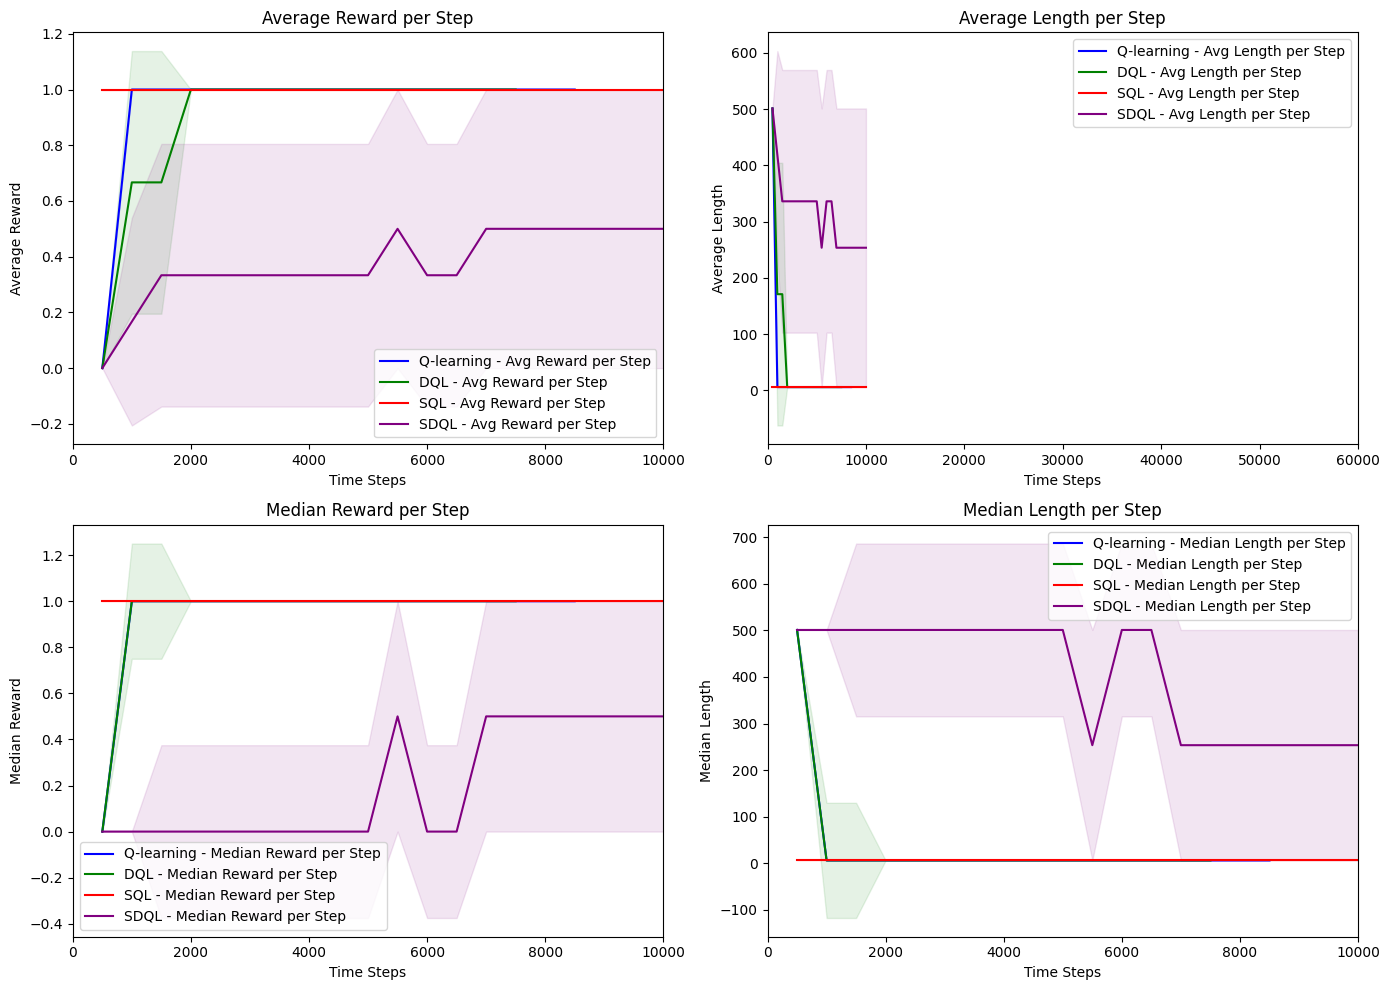

In [214]:
def plot_combined_results(results):
    plt.figure(figsize=(14, 10))

    colors = {
        'Q-learning': 'blue',
        'DQL': 'green',
        'SQL': 'red',
        'SDQL': 'purple'
    }

    plt.subplot(2, 2, 1)
    for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, avg_rewards, label=f'{algorithm} - Avg Reward per Step', color=colors[algorithm])
        plt.fill_between(avg_time_steps, np.array(avg_rewards)-np.array(std_rewards), np.array(avg_rewards)+np.array(std_rewards), alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per Step')
    plt.legend()
    plt.xlim([0, 10000])

    plt.subplot(2, 2, 2)
    for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, avg_lengths, label=f'{algorithm} - Avg Length per Step', color=colors[algorithm])
        plt.fill_between(avg_time_steps, np.array(avg_lengths)-np.array(std_lengths), np.array(avg_lengths)+np.array(std_lengths), alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Average Length')
    plt.title('Average Length per Step')
    plt.legend()
    plt.xlim([0, 60000])


    plt.subplot(2, 2, 3)
    for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, median_rewards, label=f'{algorithm} - Median Reward per Step', color=colors[algorithm])
        plt.fill_between(avg_time_steps, np.array(median_rewards)-np.array(iqr_rewards)/2, np.array(median_rewards)+np.array(iqr_rewards)/2, alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Median Reward')
    plt.title('Median Reward per Step')
    plt.legend()
    plt.xlim([0, 10000])

    plt.subplot(2, 2, 4)
    for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, median_lengths, label=f'{algorithm} - Median Length per Step', color=colors[algorithm])
        plt.fill_between(avg_time_steps, np.array(median_lengths)-np.array(iqr_lengths)/2, np.array(median_lengths)+np.array(iqr_lengths)/2, alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Median Length')
    plt.title('Median Length per Step')
    plt.legend()
    plt.xlim([0, 10000])
    plt.tight_layout()
    plt.show()

# Average results from all runs
results_q = pad_and_average_results(all_results_q)
results_dql = pad_and_average_results(all_results_dql)
results_sql = pad_and_average_results(all_results_sql)
results_sdql = pad_and_average_results(all_results_sdql)

results = {
    'Q-learning': results_q,
    'DQL': results_dql,
    'SQL': results_sql,
    'SDQL': results_sdql
}

plot_combined_results(results)


In [218]:
for _ in range(3):
    print("Training Speedy DoubleQ-learning")
    q_table_sdql, rewards_sdql, lengths_sdql, epsilons_sdql, time_steps_sdql = sdql(env, gamma=gamma,epsilon_decay=0.99999, epsilon=epsilon, min_epsilon=min_epsilon,T=total_time_steps, eval_interval=eval_every, eval_episodes=eval_episodes)
    all_results_sdql.append((rewards_sdql, lengths_sdql, epsilons_sdql, time_steps_sdql))

Training Speedy DoubleQ-learning
Time Step = 500: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.9950224045412736
Training Speedy DoubleQ-learning
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
Time Step = 3500: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.9656149034246927
Training Speedy DoubleQ-learning
eval broke
eval broke
eval broke
Time Step = 2000: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.9802083773701007


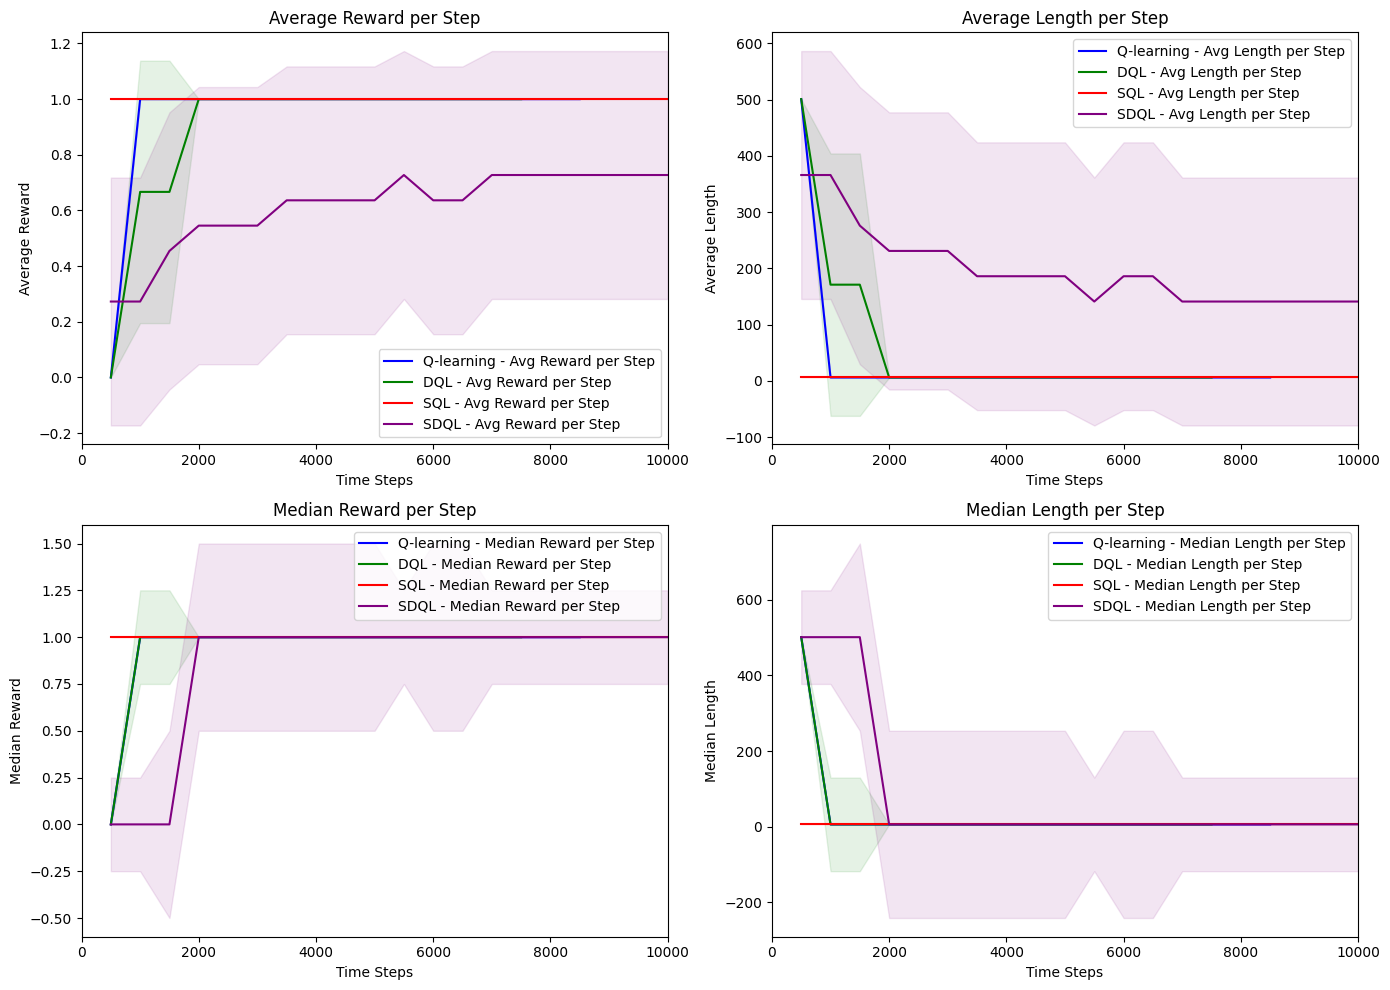

In [219]:
def plot_combined_results(results):
    plt.figure(figsize=(14, 10))

    colors = {
        'Q-learning': 'blue',
        'DQL': 'green',
        'SQL': 'red',
        'SDQL': 'purple'
    }

    plt.subplot(2, 2, 1)
    for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, avg_rewards, label=f'{algorithm} - Avg Reward per Step', color=colors[algorithm])
        plt.fill_between(avg_time_steps, np.array(avg_rewards)-np.array(std_rewards), np.array(avg_rewards)+np.array(std_rewards), alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per Step')
    plt.legend()
    plt.xlim([0, 10000])

    plt.subplot(2, 2, 2)
    for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, avg_lengths, label=f'{algorithm} - Avg Length per Step', color=colors[algorithm])
        plt.fill_between(avg_time_steps, np.array(avg_lengths)-np.array(std_lengths), np.array(avg_lengths)+np.array(std_lengths), alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Average Length')
    plt.title('Average Length per Step')
    plt.legend()
    plt.xlim([0, 10000])


    plt.subplot(2, 2, 3)
    for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, median_rewards, label=f'{algorithm} - Median Reward per Step', color=colors[algorithm])
        plt.fill_between(avg_time_steps, np.array(median_rewards)-np.array(iqr_rewards)/2, np.array(median_rewards)+np.array(iqr_rewards)/2, alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Median Reward')
    plt.title('Median Reward per Step')
    plt.legend()
    plt.xlim([0, 10000])

    plt.subplot(2, 2, 4)
    for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, median_lengths, label=f'{algorithm} - Median Length per Step', color=colors[algorithm])
        plt.fill_between(avg_time_steps, np.array(median_lengths)-np.array(iqr_lengths)/2, np.array(median_lengths)+np.array(iqr_lengths)/2, alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Median Length')
    plt.title('Median Length per Step')
    plt.legend()
    plt.xlim([0, 10000])
    plt.tight_layout()
    plt.show()

# Average results from all runs
results_q = pad_and_average_results(all_results_q)
results_dql = pad_and_average_results(all_results_dql)
results_sql = pad_and_average_results(all_results_sql)
results_sdql = pad_and_average_results(all_results_sdql)

results = {
    'Q-learning': results_q,
    'DQL': results_dql,
    'SQL': results_sql,
    'SDQL': results_sdql
}

plot_combined_results(results)


In [226]:
for _ in range(3):
    print("Training Speedy DoubleQ-learning")
    q_table_sdql, rewards_sdql, lengths_sdql, epsilons_sdql, time_steps_sdql = sdql(env, gamma=gamma,epsilon_decay=0.99995, epsilon=epsilon, min_epsilon=min_epsilon,T=total_time_steps, eval_interval=eval_every, eval_episodes=eval_episodes)
    all_results_sdql.append((rewards_sdql, lengths_sdql, epsilons_sdql, time_steps_sdql))

Training Speedy DoubleQ-learning


eval broke
Time Step = 1000: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.9512757992150053
Training Speedy DoubleQ-learning
eval broke
eval broke
Time Step = 1500: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.9277881361599748
Training Speedy DoubleQ-learning
eval broke
eval broke
eval broke
eval broke
eval broke
eval broke
Time Step = 3500: Avg Reward = 1.0, Avg Length = 6.0, epsilon = 0.8394953227965053


In [273]:
sdql_res = all_results_sdql[11:]
sqdl_rewards = []
for i in range(3):
    sqdl_rewards.append(sdql_res[i][0])
# print(sqdl_rewards)

mean_r_sdql = []
for j in range(20):
    each_mean = 0
    for i in range(3):
        each_mean += sqdl_rewards[i][j]
    mean_r_sdql.append(each_mean/3)

sqdl_lens = []
for i in range(3):
    sqdl_lens.append(sdql_res[i][1])

mean_l_sdql = []
for j in range(20):
    each_mean = 0
    for i in range(3):
        each_mean += sqdl_lens[i][j]
    mean_l_sdql.append(each_mean/3)
print(mean_l_sdql)

sqdl_step = sdql_res[i][-1]
results_sdql = (mean_r_sdql, mean_l_sdql, sqdl_step)

# # Average results from all runs
# results_q = pad_and_average_results(all_results_q)
# results_dql = pad_and_average_results(all_results_dql)
# results_sql = pad_and_average_results(all_results_sql)
# results_sdql = pad_and_average_results(all_results_sdql)

# results = {
#     'Q-learning': results_q,
#     'DQL': results_dql,
#     'SQL': results_sql,
#     'SDQL': results_sdql
# }

# plot_combined_results(results)


[501.0, 336.0, 171.0, 171.0, 171.0, 171.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]


In [274]:
q_res = all_results_q
print(len(q_res[-1]))
q_rewards = []
for i in range(3):
    q_rewards.append(q_res[i][0])
print(q_rewards)

mean_r_q = []
for j in range(20):
    each_mean = 0
    for i in range(3):
        if len(q_rewards[i]) < 20:
            q_rewards[i].append(1)
        each_mean += q_rewards[i][j]
    mean_r_q.append(each_mean/3)

q_lens = []
for i in range(3):
    q_lens.append(q_res[i][1])

mean_l_q = []
for j in range(20):
    each_mean = 0
    for i in range(3):
        if len(q_lens[i]) < 20:
            q_lens[i].append(6)
        each_mean += q_lens[i][j]
    mean_l_q.append(each_mean/3)

results_q = (mean_r_q, mean_l_q, sqdl_step)


4
[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1]]


In [275]:
dql_res = all_results_dql

print(len(dql_res[-1]))
dql_rewards = []
for i in range(3):
    dql_rewards.append(dql_res[i][0])
print(dql_rewards)

mean_r_dql = []
for j in range(20):
    each_mean = 0
    for i in range(3):
        if len(dql_rewards[i]) < 20:
            dql_rewards[i].append(1)
        each_mean += dql_rewards[i][j]
    mean_r_dql.append(each_mean/3)

dql_lens = []
for i in range(3):
    dql_lens.append(dql_res[i][1])

mean_l_dql = []
for j in range(20):
    each_mean = 0
    for i in range(3):
        if len(dql_lens[i]) < 20:
            dql_lens[i].append(6)
        each_mean += dql_lens[i][j]
    mean_l_dql.append(each_mean/3)

results_dql = (mean_r_dql, mean_l_dql, sqdl_step)

4
[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1, 1], [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1]]


In [276]:
sql_res = all_results_sql

print(len(sql_res[-1]))
sql_rewards = []
for i in range(3):
    sql_rewards.append(sql_res[i][0])
print(sql_rewards)

mean_r_sql = []
for j in range(20):
    each_mean = 0
    for i in range(3):
        if len(sql_rewards[i]) < 20:
            sql_rewards[i].append(1)
        each_mean += sql_rewards[i][j]
    mean_r_sql.append(each_mean/3)

sql_lens = []
for i in range(3):
    sql_lens.append(sql_res[i][1])

mean_l_sql = []
for j in range(20):
    each_mean = 0
    for i in range(3):
        if len(sql_lens[i]) < 20:
            sql_lens[i].append(6)
        each_mean += sql_lens[i][j]
    mean_l_sql.append(each_mean/3)

results_sql = (mean_r_sql, mean_l_sql, sqdl_step)

4
[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]


In [277]:
def plot_combined_results_diff(results):
    plt.figure(figsize=(14, 10))

    colors = {
        'Q-learning': 'blue',
        'DQL': 'green',
        'SQL': 'red',
        'SDQL': 'purple'
    }

    plt.subplot(2, 2, 1)
    for algorithm, (avg_rewards, avg_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, avg_rewards, label=f'{algorithm} - Avg Reward vs TimeStep', color=colors[algorithm])
        # plt.fill_between(avg_time_steps, np.array(avg_rewards)-np.array(std_rewards), np.array(avg_rewards)+np.array(std_rewards), alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward vs TimeStep')
    plt.legend()
    plt.xlim([0, 10000])

    plt.subplot(2, 2, 2)
    for algorithm, (avg_rewards, avg_lengths, avg_time_steps) in results.items():
        plt.plot(avg_time_steps, avg_lengths, label=f'{algorithm} - Avg Length vs TimeStep', color=colors[algorithm])
        # plt.fill_between(avg_time_steps, np.array(avg_lengths)-np.array(std_lengths), np.array(avg_lengths)+np.array(std_lengths), alpha=0.1, color=colors[algorithm])
    plt.xlabel('Time Steps')
    plt.ylabel('Average Length')
    plt.title('Average Length vs TimeStep')
    plt.legend()
    plt.xlim([0, 10000])


    # plt.subplot(2, 2, 3)
    # for algorithm, (avg_rewards, avg_lengths, avg_time_steps) in results.items():
    #     plt.plot(avg_time_steps, median_rewards, label=f'{algorithm} - Median Reward per Step', color=colors[algorithm])
    #     # plt.fill_between(avg_time_steps, np.array(median_rewards)-np.array(iqr_rewards)/2, np.array(median_rewards)+np.array(iqr_rewards)/2, alpha=0.1, color=colors[algorithm])
    # plt.xlabel('Time Steps')
    # plt.ylabel('Median Reward')
    # plt.title('Median Reward per Step')
    # plt.legend()
    # plt.xlim([0, 10000])

    # plt.subplot(2, 2, 4)
    # for algorithm, (avg_rewards, std_rewards, median_rewards, iqr_rewards, avg_lengths, std_lengths, median_lengths, iqr_lengths, avg_time_steps) in results.items():
    #     plt.plot(avg_time_steps, median_lengths, label=f'{algorithm} - Median Length per Step', color=colors[algorithm])
    #     plt.fill_between(avg_time_steps, np.array(median_lengths)-np.array(iqr_lengths)/2, np.array(median_lengths)+np.array(iqr_lengths)/2, alpha=0.1, color=colors[algorithm])
    # plt.xlabel('Time Steps')
    # plt.ylabel('Median Length')
    # plt.title('Median Length per Step')
    # plt.legend()
    # plt.xlim([0, 10000])

    plt.tight_layout()
    plt.show()

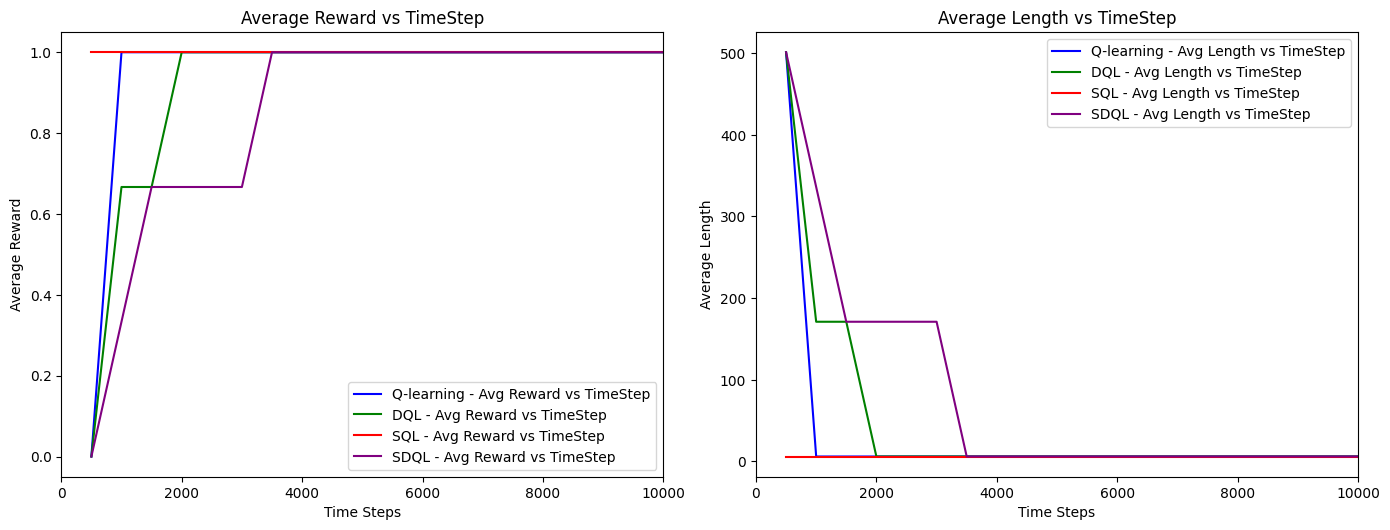

In [278]:
results = {
    'Q-learning': results_q,
    'DQL': results_dql,
    'SQL': results_sql,
    'SDQL': results_sdql
}

plot_combined_results_diff(results)